<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

import statsmodels.api as sm


## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.
bike = pd.read_csv('data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [3]:
bike.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [4]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [5]:
bike['starttime'] = pd.to_datetime(bike['starttime'])
bike['stoptime'] = pd.to_datetime(bike['stoptime'])
bike['birth year'] = pd.to_numeric(bike['birth year'], errors = 'coerce')

In [6]:
bike.describe()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,224736.000000,224736,224736,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,218019.000000,224736.000000
mean,874.519810,2014-02-16 10:57:36.762801920,2014-02-16 11:12:11.282611456,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1975.497507,1.154617
min,60.000000,2014-02-01 00:00:00,2014-02-01 00:04:24,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,360.000000,2014-02-07 22:50:19.249999872,2014-02-07 23:12:25.249999872,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1968.000000,1.000000
50%,544.000000,2014-02-19 08:42:06.500000,2014-02-19 08:54:36,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1978.000000,1.000000
75%,845.000000,2014-02-24 08:39:46.249999872,2014-02-24 08:51:46,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1985.000000,1.000000
max,766108.000000,2014-02-28 23:59:47,2014-03-02 13:51:10,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,1997.000000,2.000000
std,5486.092219,NaN,NaN,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,11.423985,0.436592


In [7]:

bike.isnull().sum()


tripduration                  0
starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                 6717
gender                        0
dtype: int64

In [8]:
bike.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                        float64
gender                              int64
dtype: object

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

Null Hypothesis: there is no difference in average trip duration for gender = 1 and gender = 2 
Alternative Hypothesis: there is a difference in average trip duration for gender = 1 amd gender = 2

In [9]:
ttest_ind(bike[bike['gender'] == 1]['tripduration'],
          bike[bike['gender'] == 2]['tripduration'])

TtestResult(statistic=-5.929304472651931, pvalue=3.0467626856603033e-09, df=218003.0)

Answer: trip duration is different since p value is very small (<0/5)

## What numeric columns shouldn't be treated as numeric?

**Answer:** start and end station id 

## Dummify the `start station id` Variable

In [10]:
bike = pd.get_dummies(bike, columns = ['start station id'], drop_first = True, dtype = int)
bike

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224731,848,2014-02-28 23:57:13,2014-03-01 00:11:21,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,...,0,0,0,0,0,0,0,0,0,0
224732,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,...,0,0,0,0,0,0,0,0,0,0
224733,304,2014-02-28 23:58:17,2014-03-01 00:03:21,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,...,0,0,0,0,0,0,0,0,0,0
224734,308,2014-02-28 23:59:10,2014-03-01 00:04:18,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,...,0,0,0,0,0,0,0,0,0,0


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [11]:
bike['birth year'].unique()

array([1991., 1979., 1948., 1981., 1990., 1978., 1944., 1983., 1969.,
       1986., 1962., 1965., 1942., 1989., 1980., 1957., 1951., 1992.,
       1971., 1982., 1968., 1984.,   nan, 1956., 1987., 1985., 1996.,
       1975., 1988., 1974., 1972., 1959., 1973., 1977., 1976., 1953.,
       1993., 1970., 1963., 1967., 1966., 1960., 1961., 1994., 1958.,
       1955., 1946., 1964., 1900., 1995., 1954., 1952., 1949., 1947.,
       1941., 1938., 1950., 1945., 1997., 1934., 1940., 1939., 1936.,
       1943., 1935., 1937., 1922., 1932., 1907., 1926., 1899., 1901.,
       1917., 1910., 1933., 1921., 1927., 1913.])

In [12]:
bike.loc[bike['birth year'] == '\\N','birth year'] = np.nan
bike['age'] = bike['birth year'].map(lambda x: 2014 - int(x),
                                             na_action = 'ignore')

In [13]:
bike.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,23.0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,35.0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,66.0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,33.0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,24.0


In [14]:
bike.isnull().sum()

tripduration                 0
starttime                    0
stoptime                     0
start station name           0
start station latitude       0
                          ... 
start station id_2021        0
start station id_2022        0
start station id_2023        0
start station id_3002        0
age                       6717
Length: 343, dtype: int64

<Axes: >

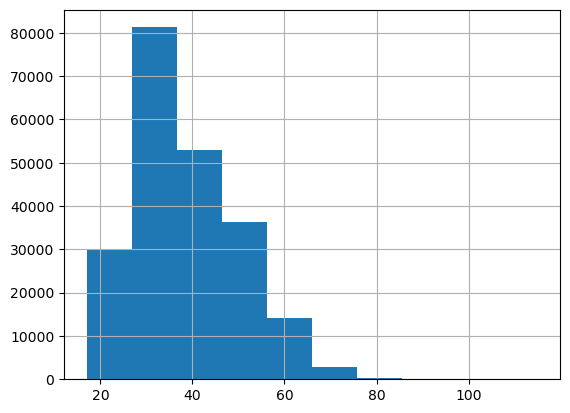

In [15]:
bike['age'].hist()

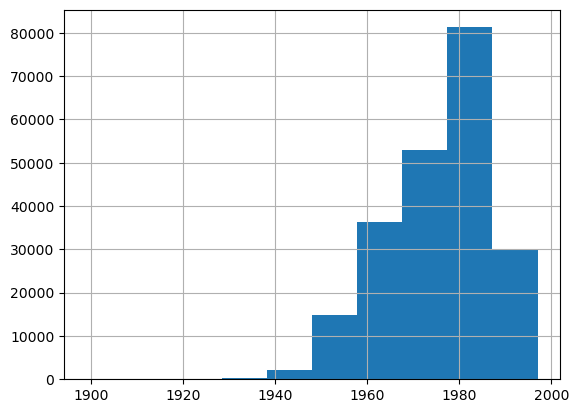

In [16]:
bike['birth year'].dropna().astype(int).hist();

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [17]:
bike = pd.get_dummies(bike, columns = ['usertype'], drop_first = True)

In [18]:
bike.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Columns: 343 entries, tripduration to usertype_Subscriber
dtypes: bool(1), datetime64[ns](2), float64(6), int64(332), object(2)
memory usage: 586.6+ MB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(bike.dropna().drop(columns=['tripduration', 'birth year', 'bikeid',
                                                                           'end station longitude', 'end station latitude',
                                                                           'end station name', 'end station id',
                                                                           'start station longitude', 'start station latitude',
                                                                           'start station name', 'starttime', 'stoptime']),
                                                    bike.dropna()['tripduration'],
                                                    test_size=0.2,
                                                    random_state=123)

In [20]:
X_train.head()

,gender,start station id_79,start station id_82,start station id_83,start station id_116,start station id_119,start station id_120,start station id_127,start station id_128,start station id_137,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
147618,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35.0,True
43852,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49.0,True
21811,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27.0,True
142383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,True
50231,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.0,True


## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [21]:
model = LinearRegression()
model.fit (X_train, y_train)
preds = model.predict (X_test)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [22]:
#mse
print(f'MSE on training set: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE on testing set: {mean_squared_error(y_test, preds)}')

MSE on training set: 33236295.991138205
MSE on testing set: 16855069.419826586


In [23]:
#r2
print(f'R^2 on training set: {r2_score(y_train, model.predict(X_train))}')
print(f'R^2 on testing set: {r2_score(y_test, preds)}')

R^2 on training set: 0.003732147945243791
R^2 on testing set: -0.0048230218247127254


Answer: underfit 

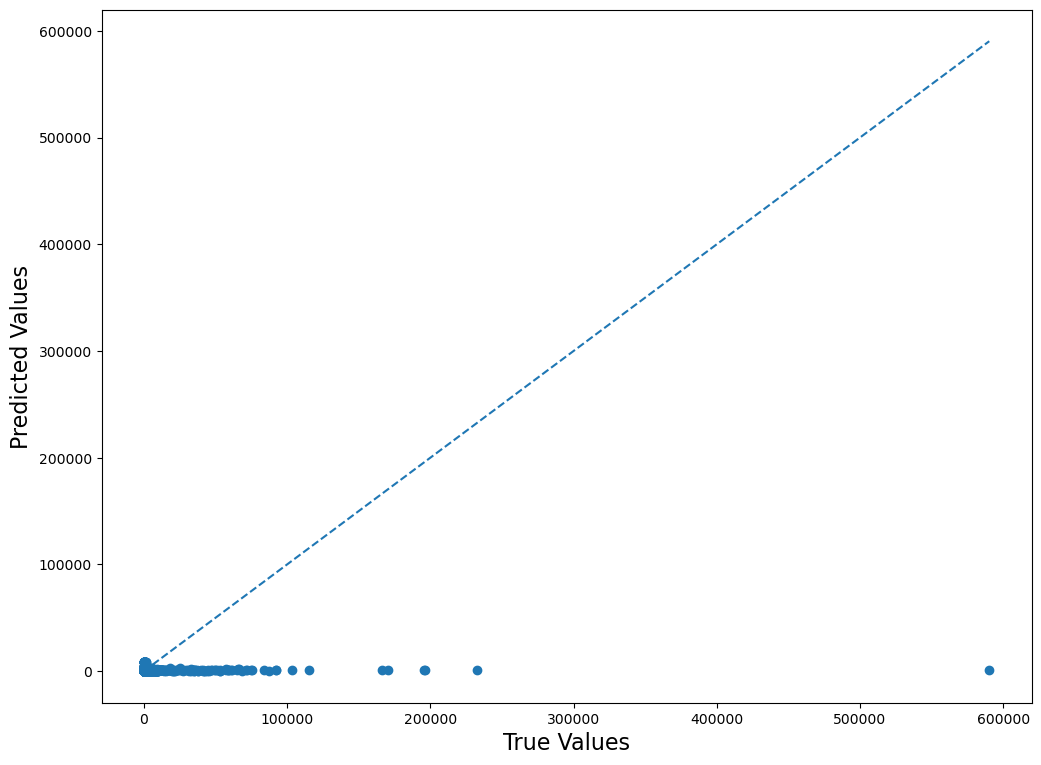

In [24]:
plt.figure(figsize = (12, 9))

plt.scatter(y_test, preds)


plt.plot([0, max(max(y_test),max(preds))],
         [0, max(max(y_test),max(preds))],
         linestyle = '--')

plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

In [25]:
print(f'MSE of baseline model: {mean_squared_error(y_test, [np.mean(y_train)] * len(y_test))}')
print(f'R^2 of baseline model: {r2_score(y_test, [np.mean(y_train)] * len(y_test))}')

MSE of baseline model: 16778197.42995127
R^2 of baseline model: -0.00024026139601152074


Answer: the model is bad and overfit

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [26]:
# add constant 
X_train = sm.add_constant(X_train)


In [28]:
model_sm = sm.OLS(y_train, X_train.astype(float)).fit()

In [ ]:
bike.info()

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [29]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.976
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.64e-23
Time:                        13:20:00   Log-Likelihood:            -1.7578e+06
No. Observations:              174415   AIC:                         3.516e+06
Df Residuals:                  174084   BIC:                         3.520e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   339.1261    131.765      2.574      0.010      80.870     597.382
gender                  178.9245     35.542      5.034      0.000     109.263     248.586
start station id_79      20.4768    361.912      0.057      0.955    -688.863     729.816
start station id_82    -455.1307    477.240     -0.954      0.340   -1390.511     480.250
start station id_83    -218.9387    461.841     -0.474      0.635   -1124.136     686.259
start station id_116   -405.8722    309.906     -1.310      0.190   -1013.280     201.536
start station id_119   -347.9569    936.814     -0.371      0.710   -2184.091    1488.178
start station id_120    897.8401    717.844      1.251      0.211    -509.117    2304.798
start station id_127   -355.4668    326.278     -1.089      0.276    -994.965     284.031
start station id_128   -359.5798    322.725     -1.114      0.265    -992.113     272.954
start station id_137   -379.0678    387.621     -0.978      0.328   -1138.797     380.661
start station id_143   -359.2094    541.642     -0.663      0.507   -1420.816     702.397
start station id_144   -146.8196    754.903     -0.194      0.846   -1626.413    1332.774
start station id_146   -473.3493    380.990     -1.242      0.214   -1220.082     273.383
start station id_147    -60.8850    334.087     -0.182      0.855    -715.688     593.918
start station id_150    136.6086    376.197      0.363      0.717    -600.729     873.946
start station id_151   -412.1857    298.295     -1.382      0.167    -996.836     172.465
start station id_152   -449.3211    421.209     -1.067      0.286   -1274.881     376.239
start station id_153   -379.8976    327.232     -1.161      0.246   -1021.265     261.469
start station id_157    146.4076    443.749      0.330      0.741    -723.331    1016.147
start station id_160   -280.2529    366.384     -0.765      0.444    -998.358     437.852
start station id_161   -453.7822    316.617     -1.433      0.152   -1074.344     166.780
start station id_164   -280.4457    359.974     -0.779      0.436    -985.986     425.095
start station id_167   -269.9957    334.759     -0.807      0.420    -926.116     386.125
start station id_168   -322.8253    309.416     -1.043      0.297    -929.274     283.623
start station id_173   -378.8441    331.655     -1.142      0.253   -1028.881     271.193
start station id_174    316.0947    343.506      0.920      0.357    -357.169     989.358
start station id_195    397.4999    355.838      1.117      0.264    -299.935    1094.935
start station id_212   -302.5893    329.713     -0.918      0.359    -948.820     343.641
start station id_216   -245.3537    799.650     -0.307      0.759   -1812.649    1321.942
start station id_217    -82.6458    726.507     -0.114      0.909   -1506.583    1341.292
start station id_218   

The $p$-value for age is less than 0.001, which means that $p < \alpha$ and we will reject $H_0$. This means we accept our alternative hypothesis, $H_A$, and accept that `age` is a significant predictor of `tripduration`

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

Age and Gender are significant predictors of `tripduration`. Both coefficients are positive, indicating that as `age` and `gender` increase, `tripduration` increases. We should market towards older people who identify as `gender=2`.
